# biorbd #1 - Rototrans

This tutorial is a trivial example on how to manage Rototranslation object with biorbd.

It is designed to show how one can find the rototranslation matrix between any segment.

The rototranslation $^{j}T_i$ (aka homogeneous transform) allows to transform any point $ \textbf{p} $ in frame i to another frame j.
\begin{pmatrix}R_{11}&R_{12}&R_{13}&T_{1}\\ 
R_{21}&R_{22}&R_{23}&T_{2}\\ 
R_{31}&R_{32}&R_{33}&T_{3}\\ 
0&0&0&1\\
\end{pmatrix} 

In our example, we will use the wu model.
When you load it, the model is in anatomical posture, in this example we will try to find the Rotranslation matrix between ulna and humerus when the elbow is bend.

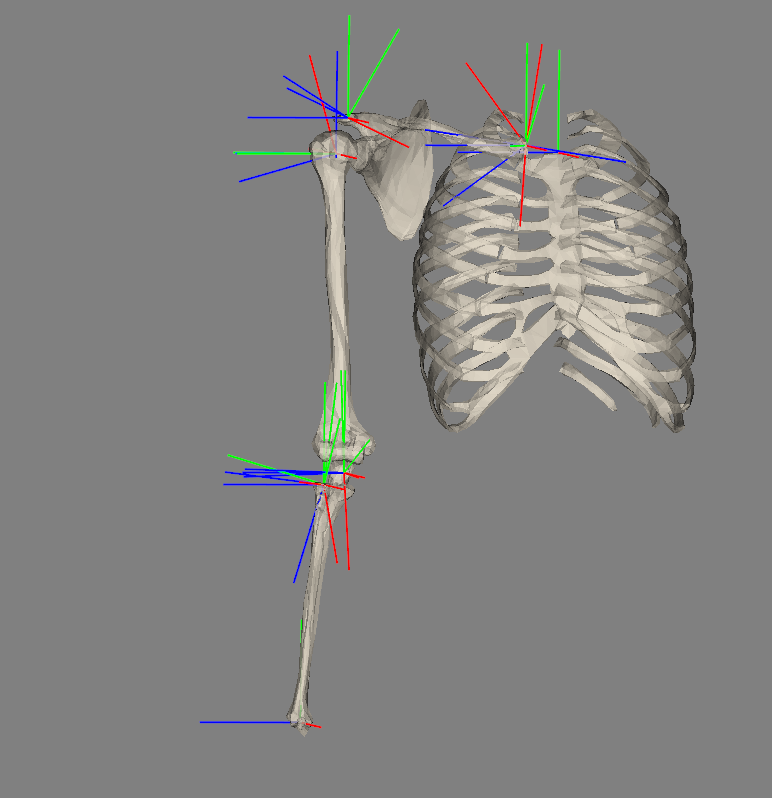

### Formula

Let $ ^{w}T_{s} $ the homogeneous transform matrix between segment and world.

We have :

$ \mathbf{p_{w}}$=$ ^{w}T_{s} . \mathbf{p_{s}} $

If we want the rototrans matrix between two segment i and j, we need pass trough the world's frame :

$ ^{i}T_{j}$ =$ ^{i}T_{world} .   ^{world}T_{j} $

$ ^{i}T_{w}$ = $ ^{w}T_{i}^{-1}$

Finally  :  $ \mathbf{p_{i}}$ =$  ^{i}T_{j} . \mathbf{p_{j}} $

The position in i in relation to j is given by the rototranslation matrix between i and j, multiplied by the position in j.

___

In [2]:
import bioviz
import numpy as np
import biorbd

In [3]:
# Load the model
model_name = "models/wu_converted_definitif.bioMod"

biorbd_model = biorbd.Model(model_name)

# Now the model is loaded as a biorbd object

We place set the degrees of freedom of the model in a chosen pose for the sake of the tutorial.

In [24]:
# Q is supposed to be same dimension as biorbd_model.nbQ()

Q = np.array(
    [ 
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        1.6282,
        0.0,
        1.1806,
        0.0
    ]
) 
# here is the Q when the elbow is bend (rotation of ulna by almost pi/2)

Now we have to find the numbers of our segment, ulna and humerus, in order to build the rototranslation matrices.

In [25]:
nb_humerus = biorbd_model.GetBodyBiorbdId("humerus") # this function can be use to find a segment name
nb_ulna = biorbd_model.GetBodyBiorbdId("ulna")
print("Humerus is segment ", nb_humerus)
print("Ulna is segment ", nb_ulna)

Humerus is segment  23
Ulna is segment  30


So, we want to find the rototrans (aka homogeneous transform) of ulna and the humerus from local to global coordinates.


In [26]:
Rototrans_matrix_world_humerus = biorbd_model.globalJCS(Q, nb_humerus).to_array() # We converted the matrix into array in order to do matrice's operation thanks to numpy
Rototrans_matrix_world_ulna = biorbd_model.globalJCS(Q, nb_ulna).to_array() # globaJCS() return the joint coordinate system (JCS) for the segment in global reference frame at a given Q.
print("T_world_humerus")
print(Rototrans_matrix_world_humerus)
print("T_world_ulna")
print(Rototrans_matrix_world_ulna)

T_world_humerus
[[ 9.99999957e-01 -2.07816773e-04  2.03543983e-04 -2.17852518e-02]
 [-2.15133279e-04 -5.73721101e-02  9.98352839e-01 -2.72586523e-03]
 [-1.95797038e-04 -9.98352843e-01 -5.73721534e-02  2.16064773e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
T_world_ulna
[[ 0.38168936 -0.9220298   0.06460863 -0.01520385]
 [-0.05639745  0.04653795  0.99732319  0.00449058]
 [-0.92256846 -0.38431141 -0.03423709  0.52651077]
 [ 0.          0.          0.          1.        ]]


We want to find the transformation matrix between humerus and ulna
$^{humerus}T_{ulna}$=$^{humerus}T_{w}. $$^{w}T_{ulna}$

$^{humerus}T_{w}$ is the inverse matrix of $^{w}T_{humerus}$, we use .transpose() on the Rototrans object which actually inverses the rototranslation matrix.

In [28]:
Rototrans_matrix_humerus_world = biorbd_model.globalJCS(Q, nb_humerus).transpose().to_array()

# Be aware that Rototrans_matrix_world_humerus.transpose() would give the wrong matrix

# Finally
Rototrans_matrix_humerus_ulna = np.matmul(Rototrans_matrix_humerus_world, Rototrans_matrix_world_ulna)

print("T_humerus_ulna")
print(Rototrans_matrix_humerus_ulna)

T_humerus_ulna
[[ 0.38188211 -0.92196453  0.06440077  0.00651906]
 [ 0.92420516  0.38120003 -0.02305127 -0.31035003]
 [-0.00329712  0.06832239  0.99765784 -0.01060505]
 [ 0.          0.          0.          1.        ]]


We now have $^{humerus}T_{ulna}$.

So, we are now able to transform the coordinates of any point in the ulna frame to the humerus frame with the following formula:

$ \mathbf{p}_{humerus}$ =$  ^{humerus}T_{ulna} . \mathbf{p}_{ulna} $

## Do It Yourself 

Now that you saw an example, let's apply what you learn on an other example.

You have to find the rototrans matrix between humerus and scapula in order to make an abduction of the arm to be parallel to transversal plan.  

In [29]:
biorbd_model.GetBodyBiorbdId("segment_name") # this function can be use to find a segment name

-1

In [41]:
# Uncomment and complete the following line 

# Rototrans_matrix_world_scapula = biorbd_model.globalJCS(Q, ...).to_array() # to complete, find the number which correspond to the scapula
# Rototrans_matrix_world_humerus = biorbd_model.globalJCS(Q, ...).to_array() # to complete, find the number which correspond to the humerus

# Rototrans_matrix_scapula_world = biorbd_model.globalJCS(Q, ...). ...().to_array() # to complete, find the right function to inverse matrix

# # Finally
# Rototrans_matrix_scapula_humerus = np.matmul(... , ... ) #put the right matrix in the matrix multiplication function

# print(Rototrans_matrix_scapula_humerus)


Now you are a wizard Har... you are a hero with Rototrans !

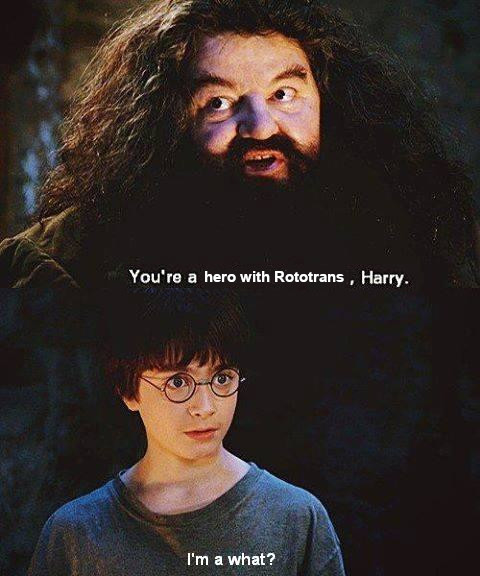